# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Dataset Description

> This dataset contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. The following tables in the dataset will aid us through the analysis to be made:

> 1)    Country: This table contains the countries where each league is played. It has 11 rows and 2 columns.

> 2)	League: This table contains leagues where each player play. It has 11 rows and 3 columns.

> 3)	Match: This table contains the matches played within the period of consideration (2008 - 2016). It has 25,979 rows and 115 columns.

> 4)	Player: This table contains the information of each player. It has 11,060 rows and 7 columns.

> 5)	Player Attributes: This column contains the features of each player. It has 183,978 rows and 42 columns.

> 6)	Team: This table contains the teams involved in the soccer matches of this dataset. It has 299 rows and 5 columns.

> 7)	Team Attributes: This table contain the attributes of the teams involved in this dataset. It has 1,458 rows and 25 columns.

## Project's Objectives
The following are the objectives of the project:

> 1) To check the relationship between number of matches and number of goals.

> 2) To check the relationship between number of matches and number of teams.

> 3) To check the relationship between player height and player weight.

> 4a) To view the distribution of height among the players involved in this dataset.

> 4b) To view the distribution of weight among the players involved in this dataset.

In [1]:
import numpy as np
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



### The first Data Wrangling step we would take is to inspect the dataset.

We load and inspect all 7 tables involved in this dataset. We do this by printing the info of each table alongside their first 3 columns.

In [2]:
country = pd.read_csv('Country.csv')
print(country.info())
country.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


,id,name
0,1,Belgium
1,1729,England
2,4769,France


In [3]:
league = pd.read_csv('League.csv')
print(league.info())
league.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
None


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [4]:
match = pd.read_csv('Match.csv')
print(match.info())
match.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [5]:
player = pd.read_csv('Player.csv')
print(player.info())
player.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB
None


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [6]:
player_att = pd.read_csv('Player_Attributes.csv')
print(player_att.info())
player_att.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [7]:
team = pd.read_csv('Team.csv')
print(team.info())
team.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [8]:
team_att = pd.read_csv('Team_Attributes.csv')
print(team_att.info())
team_att.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover



## Data Cleaning

 

Since we have 7 different tables in this dataset, the data cleaning step we would take is to join related tables together so that we can relate properties of one table to that of another.

> The first related tables to join together is country and league. Hence we join them based on their id.

In [9]:
# The first related tables to join together is country and league. Hence we join them based on their id.
country.rename(columns={'id':'country_id'}, inplace=True)
df = country.merge(league, on='country_id')
df.head()

,country_id,name_x,id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


> The combination of country and league gives us df. We can join df with matches since they both have country_id. Let's try it here.

In [10]:
# The combination of country and league gives us df. We can join df with matches since they both have country_id. Let's try it here
df = df.merge(match, on='country_id').rename(columns={'name_x':'country','name_y':'league'})
df.head(3)

,country_id,country,id_x,league,id_y,league_id,season,stage,date,match_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,Belgium,1,Belgium Jupiler League,1,1,2008/2009,1,2008-08-17 00:00:00,492473,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,1,Belgium,1,Belgium Jupiler League,2,1,2008/2009,1,2008-08-16 00:00:00,492474,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,1,Belgium,1,Belgium Jupiler League,3,1,2008/2009,1,2008-08-16 00:00:00,492475,...,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


> Another join that can happen is between player table and player_att table. Since they both have player_api_id, we will join them based on the player_api_id.

In [11]:
# Another join that can happen is between player table and player_att table. Since they both have player_api_id, we will join them based on the player_api_id.
df1 = player.merge(player_att, on='player_api_id')
df1.head(3)

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,2016-02-18 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,2015-11-19 00:00:00,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,2015-09-21 00:00:00,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


> We can also join team table and team_att table since they both have team_api_id. Let's try this.

In [12]:
# We can also join team table and team_att table since they both have team_api_id. Let's try this.
df2 = team.merge(team_att, on='team_api_id')
df2.head(3)

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22 00:00:00,45,Balanced,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,673,2011-02-22 00:00:00,66,Balanced,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,673,2012-02-22 00:00:00,53,Balanced,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


<a id='eda'></a>
## Exploratory Data Analysis


> ### Research Question 1 (The relationship between number of matches and number of goals)


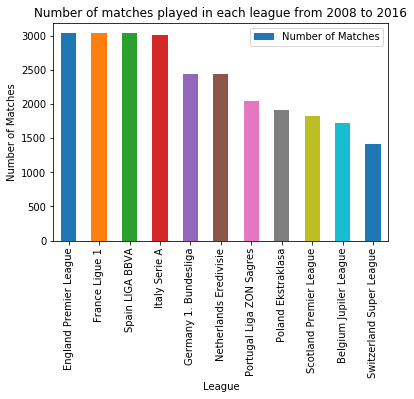

In [13]:
# We want to see the total number of matches played in each league within the period of consideration. Hence, we group df by league and count of stage.
df3 = df.groupby('league')['stage'].count()
df3 = df3.reset_index()
df3 = df3.sort_values('stage', ascending=False)
pd.DataFrame(df3)
df3 = df3.rename(columns={'league':'League','stage':'Number of Matches'})
def bar_plot(a,b,c,d):
    d.plot.bar(x=a,y=b,title=c);
    plt.xlabel(a)
    plt.ylabel(b)
bar_plot('League','Number of Matches','Number of matches played in each league from 2008 to 2016',df3)

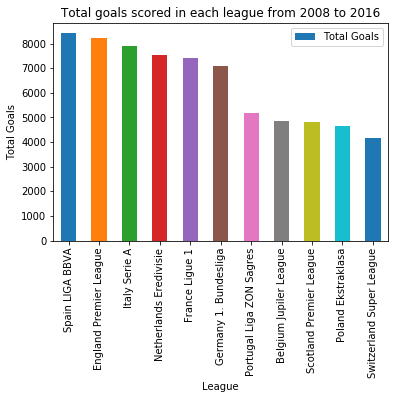

In [14]:
# We want to see the total number of goals scored in each league within the period of consideration. Hence, for df, we create a column named df['total_goals'] which will be gotten by adding home_team_goal to away_team_goal.
# We will now group df based on league and sum of total goals.
df['total_goals'] = df['home_team_goal']+df['away_team_goal']
df4 = df.groupby('league')['total_goals'].sum()
df4 = df4.reset_index()
df4 = df4.sort_values('total_goals', ascending=False)
pd.DataFrame(df4)
df4 = df4.rename(columns={'league':'League','total_goals':'Total Goals'})
bar_plot('League','Total Goals','Total goals scored in each league from 2008 to 2016',df4)

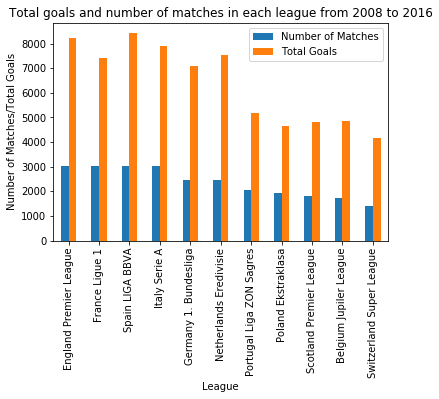

In [15]:
# Now let us show the relationship between number of matches and number of goals. We do this by joining df3 and df4 so we can have both variables on the same table.
df5 = df3.merge(df4, on='League')
#df5.plot.bar(x='league',y=['number_of_matches','total_goals']);
bar_plot('League',['Number of Matches','Total Goals'],'Total goals and number of matches in each league from 2008 to 2016',df5)
plt.ylabel('Number of Matches/Total Goals');

The above analysis shows that leagues with big number of matches have big number of goals while leagues with small number of matches have small number of goals.

> ### Research Question 2  (Relationship between number of matches and number of teams)

In [16]:
# We want to see the total number of matches played per season.
# We have a DataFrame in df that shows both season and matches played. Let us group df by season and count of matches (which is ['stage'].count().
df6 = df.groupby('season')['stage'].count()
df6 = pd.DataFrame(df6)
df6 = df6.reset_index()
df6.rename(columns={'stage':'number_of_matches'}, inplace=True)
# Let us see how the table looks.
df6

,season,number_of_matches
0,2008/2009,3326
1,2009/2010,3230
2,2010/2011,3260
3,2011/2012,3220
4,2012/2013,3260
5,2013/2014,3032
6,2014/2015,3325
7,2015/2016,3326


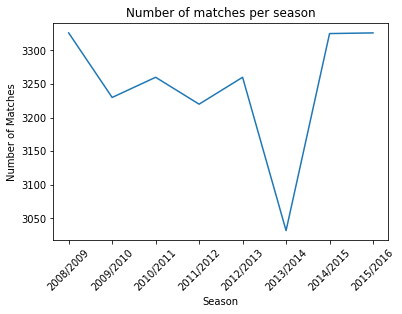

In [17]:
# Now let's plot a line graph for the table to see the trend of number of matches played along season.
def line_chart(a,b,c,d,e):
    plt.plot(a,b);
    plt.xticks(rotation=45)
    plt.xlabel(c)
    plt.ylabel(d)
    plt.title(e)
line_chart(df6['season'], df6['number_of_matches'],'Season','Number of Matches','Number of matches per season')

In [18]:
# Here, we want to see the total number of teams that participated in each season.
# To do this, we have to link season and teams together. The table df has seasons while the table "team" has teams.
# We derive team_api_id for df by appending away_team_api_id to home_team_api_id so the combination can give us team_api_id which will enable us to join df and "team" tables together.
# After joinig df and "team", we group the table by season and number of teams.

df7 = df.iloc[:,:11]
df7.rename(columns={'home_team_api_id':'team_api_id'}, inplace=True)
df8 = df.iloc[:,:12]
df8.drop('home_team_api_id',axis=1, inplace=True)
df8.rename(columns={'away_team_api_id':'team_api_id'}, inplace=True)
df9 = df7.append(df8)
df9.drop(['id_x','id_y'], axis=1, inplace=True)
df10 = df9.merge(team, on='team_api_id')
df11 = df10.groupby('season')['team_long_name'].nunique()
df11 = df11.reset_index()
df11.rename(columns={'team_long_name':'number_of_teams'}, inplace=True)
# Let us see how the table looks.
df11

,season,number_of_teams
0,2008/2009,187
1,2009/2010,185
2,2010/2011,185
3,2011/2012,185
4,2012/2013,186
5,2013/2014,174
6,2014/2015,188
7,2015/2016,188


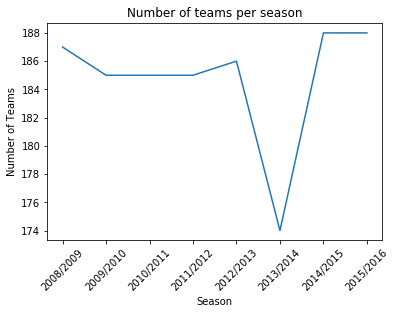

In [19]:
# Now let's plot a line graph for the table to see the trend of number of teams played along season.
line_chart(df11['season'], df11['number_of_teams'],'Season','Number of Teams','Number of teams per season')

In [20]:
# We want to see the relationship between number of matches and number of teams across seasons.
# Fisrtly, let's recall that df6 has number of matches while df11 has number of teams.They both have season as a common column.
# So we join df6 together with df11 to enable us link number of macthes and number of teams.
df12 = df6.merge(df11, on='season')
# Let us see how the table looks.
df12

,season,number_of_matches,number_of_teams
0,2008/2009,3326,187
1,2009/2010,3230,185
2,2010/2011,3260,185
3,2011/2012,3220,185
4,2012/2013,3260,186
5,2013/2014,3032,174
6,2014/2015,3325,188
7,2015/2016,3326,188


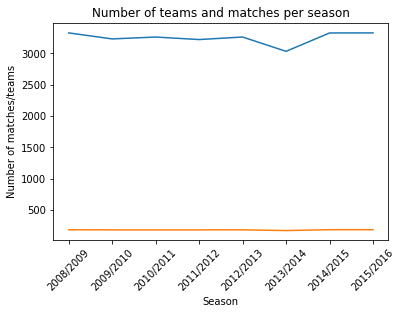

In [21]:
# Now let us visualize the relationship between number of matches and number of teams using a line graph.
line_chart(df12['season'], df12['number_of_matches'],'','','')
line_chart(df12['season'], df12['number_of_teams'],'Season','Number of matches/teams','Number of teams and matches per season')

The above visual is not expicit enough because of the number gap between number of matches and number of teams.
Let us divide number of matches by 15 for all seasons so that the number gap will be heavily reduced.

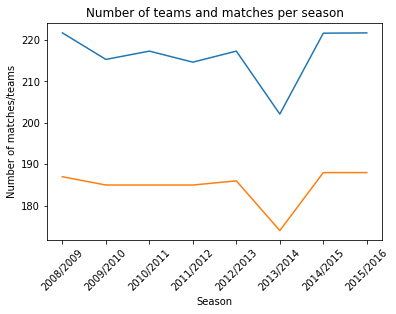

In [22]:
# The visual in the previous line is not expicit enough because of the number gap between number of matches and number of teams.
# Let us divide number of matches by 15 for all season so that the number gap will be heavily reduced.
line_chart(df12['season'], df12['number_of_matches']/15,'','','')
line_chart(df12['season'], df12['number_of_teams'],'Season','Number of matches/teams','Number of teams and matches per season')

We can see from the analysis above, that both lines follow almost the same pattern. Hence, we say, the relationship between the number of matches played in a season and number of teams in that season is that, number of matches increase as number of teams increase and vice versa.

> ### Research Question 3 (The relationship between height and weight of players)

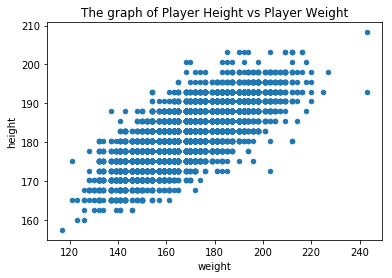

In [24]:
# We can show this relationship using the player table since it has both height and weight of the players.
player.plot.scatter(x = 'weight', y = 'height')
plt.title('The graph of Player Height vs Player Weight');

The above scatter plot shows that the relationship beteen player height and player weight is; "height increases as weight increases".

> ### Research Question 4 (The distribution of height and weight among players)

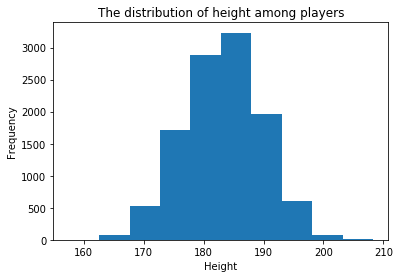

In [26]:
def distr(a,b,c):
    a.plot.hist();
    plt.xlabel(b)
    plt.title(c)
distr(player['height'],'Height','The distribution of height among players')

The above histogram shows that the distribution of player height is skewed to the right.

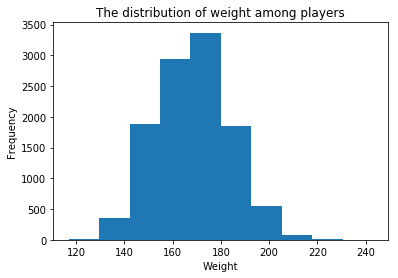

In [27]:
distr(player['weight'],'Weight','The distribution of weight among players')

The above histogram shows that the distribution of player weight is also skewed to the right.

## Counclusions

**The following conclusions can be made after exploring the soccer dataset:**

> 1) Mostly, leagues with big number of matches have big number of goals while leagues with small number of matches have small number of goals.

> 2) We can also conclude that in this dataset, the number of matches in a season increase as the number of teams increase and vice versa.

> 3) Furthermore, we can conclude from this dataset that, the higher the height of a player, the heavier the weight of the player.

> 4) Lastly, we can make the conclusion that the distribution of height and weight of the players involved in this dataset are both skewed to the right.

## Limitations
> 1) I couldn't link players to teams as there is no common column on the "player" table and "team" table. A merger of players and teams would have enabled me to make several findings pertaining to players and their teams.

> 2) I was not able to link players to countries as there is no common column on the "player" table and either of "country", "league" or "match" table. A merger of such would have uncovered stuffs like; countries with most players within the period of consideration, countries with most players in each league, e.t.c.   

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0